# Dimension Reduction on MNIST

## Uploading and visualization the MNIST Dataset

In [1]:
# Importing packages
import os
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.

import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torchvision import transforms as tt
from torchvision.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sn


warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# configs
data_dir = './dataset'

In [3]:
# Download Mnist
if not os.path.exists(f'{data_dir}/MNIST'):
    train_set = mnist.MNIST(data_dir, train=True, download=True)
    test_set = mnist.MNIST(data_dir, train=False, download=True)

In [15]:
transform = tt.Compose([
    np.array
])
train_set = mnist.MNIST(data_dir, train=True, download=False, transform=transform)
test_set = mnist.MNIST(data_dir, train=False, download=False, transform=transform)

In [16]:
def set_transform(transform, datasets: list):
    for dataset in datasets:
        dataset.transform = transform

In [17]:
# log train_set and test_set
def log_mnist(dataset: mnist.MNIST):
    train = dataset.train
    print(f'{"Train" if train else "Test"} Set Info'.center(100, '='))
    print(f'dataset length: {len(dataset)}')
    print('item 0:'.center(100, '*'))
    print(type(dataset[0]), len(dataset[0]))
    # print([(type(item), item) for item in dataset[0]])
    print(dataset[0][0].shape)
    print('*'*100)

log_mnist(train_set)
log_mnist(test_set)

===========================================Train Set Info===========================================
dataset length: 60000
**********************************************item 0:***********************************************
<class 'tuple'> 2
(28, 28)
****************************************************************************************************
===========================================Test Set Info============================================
dataset length: 10000
**********************************************item 0:***********************************************
<class 'tuple'> 2
(28, 28)
****************************************************************************************************


Label:  4


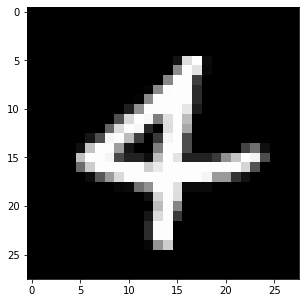

In [7]:
def show_img(dataset, idx):
    print('Label: ',dataset[idx][1])
    # ploting a sample number visually
    plt.figure(figsize=(5,5))

    grid_data=dataset[idx][0].reshape(28,28) # reshaping from 1d to 2d
    plt.imshow(grid_data,interpolation='none',cmap='gray')
    plt.show()

# ploting a sample number visually
show_img(train_set, 150)

## 2 D visualization of MNIST manually

### 1 Data-preprocessing : standardizing tha dataset

In [19]:
# 1 Compute mean and std
transform = tt.Compose([
    tt.ToTensor()
])
set_transform(transform, [train_set, test_set])
print(train_set[0][0].shape)
mean = [0]
std = [0]
for i in range(len(mean)):
    for img, _ in train_set:
        img = img.numpy()
        mean[i] += np.mean(img)
        std[i] += np.mean(np.square(img).flatten())
    mean[i] /= len(train_set)
    std[i] = np.sqrt(std[i] / len(train_set))

print(mean, std)

torch.Size([1, 28, 28])
[0.13066047807612147] [0.3346678650889437]


In [21]:
# standardizing the dataset with mean and std
transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(mean, std)
])
set_transform(transform, [train_set, test_set])
train_loader = DataLoader(train_set, batch_size=len(train_set))
sample_data = next(iter(train_loader))[0].numpy()
print('sample_data'.center(100, '*'))
print(sample_data.shape)

********************************************sample_data*********************************************
(60000, 1, 28, 28)


### 2 Compute co-variance matrix with A^T * A

In [ ]:
# creating same data sample for co-variance matrix : A^T * A
sample_data = standard_data

# Matrix multiplication with numpy
covar_matrix = np.matmul(sample_data.T,sample_data)
print('The shape of co-variance matrix = ',covar_matrix.shape)

In [ ]:
# working with eigen-vectors and eigen-values
from scipy.linalg import eigh # from scipy of linear algebra
values, vectors = eigh(covar_matrix,eigvals=(782,783)) # returns the values and vectors from co-var matrix, top two(782,783)
print('The shape of eigen vectors is ', vectors.shape)
vectors = vectors.T
print('The updated shape of eigen vectors is',vectors.shape)

In [ ]:
# reducing the dimentions of 784-d data set into 2-d data set by the above eigen vector
new_coordinates = np.matmul(vectors,sample_data.T)
print('The resultent new data points\' shape is ', vectors.shape, 'X', sample_data.T.shape, '=', new_coordinates.shape)

In [ ]:
# appending labels with new data set of 2d projection
new_coordinates = np.vstack((new_coordinates,label)).T

In [ ]:
print('The shape of new data set is ',new_coordinates.shape)

In [ ]:
# Creating the data frame
matrix_df = pd.DataFrame(data= new_coordinates,columns=('1st_principal','2nd_principal','labels'))
print(matrix_df.head(5))

In [ ]:
sn.FacetGrid(matrix_df,hue='labels',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

## 2 D visualization of MNIST using PCA

In [ ]:
# using SKlearn importing PCA
from sklearn import decomposition
pca = decomposition.PCA()

## PCA for dimensionality redcution (not for visualization)

In [ ]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

In [ ]:
# directly entering parameters 
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print('shape of pca_reduced data = ',pca_data.shape)

In [ ]:
# Data massaging - adding label colomn to the reduced matrix
pca_data = np.vstack((pca_data.T,label)).T

In [ ]:
# dataframing and plotting the pca data
pca_df = pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','labels'))
sn.FacetGrid(pca_df,hue='labels',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

## Data visualization using t-SNE

In [ ]:
from sklearn.manifold import TSNE

# picking 1000 datapoints
data_1000 = standard_data[0:1000,:]
label_1000 = label[0:1000]

# designing model with default values perplexity = 30, n_iteration = 1000
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

In [ ]:
# Designing model with perpelexity = 50

model = TSNE(n_components=2,perplexity=50,random_state=0)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

In [ ]:
# Designing the model with perplexity = 50 and iteration  = 5000

model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data= tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

In [ ]:
# building models with 15k data set
data_15k = standard_data[0:15000,:]
label_15k = label[0:15000]

model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_15k)
tsne_data = np.vstack((tsne_data.T,label_15k)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

In [ ]:
# Data modeling with 15k Training data set and 5000 
model =  TSNE(n_components=2,random_state=0,perplexity=40,n_iter=5000)
tsne_data = model.fit_transform(data_15k)
tsne_data = np.vstack((tsne_data.T,label_15k)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

In [ ]:
# Data modeling with whole Training data set(42k)
data_42k = standard_data
label_42k = label
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_42k)
tsne_data = np.vstack((tsne_data.T,label_42k)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()